In [55]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings

In [56]:
# Read the data
train_df = pd.read_csv('Resources/train.csv')
test_df = pd.read_csv('Resources/test.csv')

In [57]:
# Create Total Living Area SF and Price Per SF for lot and Living Area 
basement1 = train_df['BsmtFinSF1']
basement2 = train_df['BsmtFinSF2']
living_space = train_df['GrLivArea']
sale_price = train_df['SalePrice']

total_square_feet = living_space + basement1 + basement2
cost_per_square_feet = sale_price / total_square_feet

# Train Set Up 
train_df['Total Square Feet (ft)'] = total_square_feet
train_df['Total Lot Square Feet (ft)'] = total_square_feet_lot
train_df['Total Cost Per Square Feet ($)'] = cost_per_square_feet.round(2)


# Test Set Up
Test_basement1 = test_df['BsmtFinSF1']
Test_basement2 = test_df['BsmtFinSF2']
Test_living_space = test_df['GrLivArea']



Test_total_square_feet = Test_living_space + Test_basement1 + Test_basement2
test_df['Total Square Feet (ft)'] = total_square_feet

In [58]:
#Train Encoding, created multiple additional columns
train_df_hot = pd.DataFrame(train_df, columns=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']      
        )

train_df_hot = pd.get_dummies(train_df_hot,drop_first=True)

#Test DF Hot Encoding 
test_df_hot = pd.DataFrame(test_df, columns=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']      
        )

test_df_hot = pd.get_dummies(test_df_hot,drop_first=True)


# Combine the Dataframes and Drop the String Values 
train_df = pd.concat([train_df, train_df_hot], axis=1)
train_df = train_df.drop(columns=['Id','Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'] )


test_df = pd.concat([test_df, test_df_hot], axis=1)
test_df = test_df.drop(columns=['Id','Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'] )

#Set Everything to Numeric
train_df = train_df.apply(pd.to_numeric)
test_df = test_df.apply(pd.to_numeric)

train_df = train_df.fillna(0)
test_df = test_df.fillna(0)


In [59]:
train_df = train_df.drop(columns=['SalePrice'])

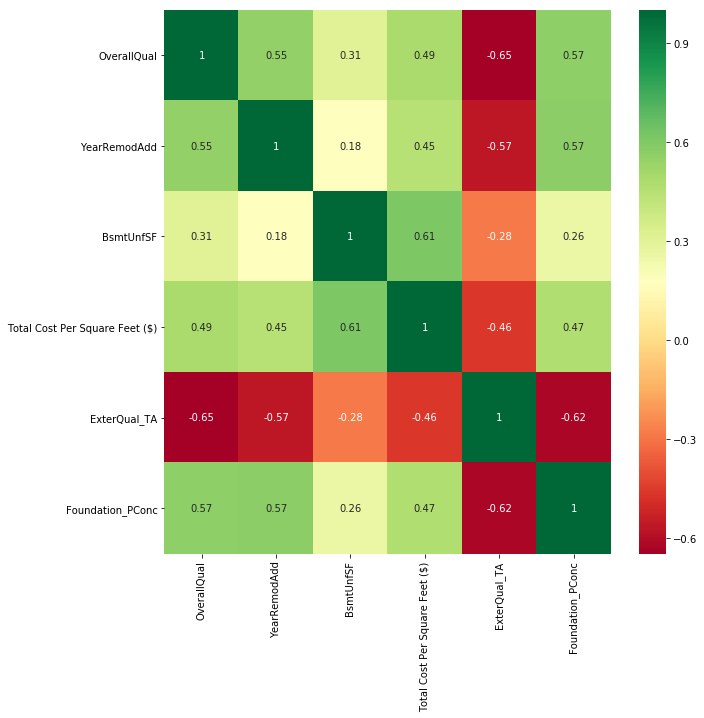

In [60]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat['Total Cost Per Square Feet ($)'])>0.45]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [62]:
strong_cor = ["OverallQual", "YearRemodAdd","BsmtUnfSF","ExterQual_TA","Foundation_PConc"]

X = train_df[strong_cor]
y = train_df["Total Cost Per Square Feet ($)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1460, 5) (1460, 1)


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [79]:
# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
#calculate R2 Score and Mean Squared Error (MSE)
from sklearn.metrics import  r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
r2 = r2_score(y, predicted)

print(f"R-squared (R2 ): {r2}")

R-squared (R2 ): 0.531143673282861


In [67]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [68]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5427163893247158
Testing Score: 0.4892975177009994


Text(0.5, 1.0, 'Residual Plot')

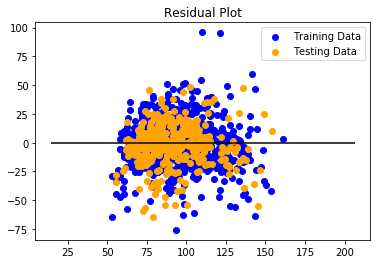

In [69]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [74]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 42)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9897327659059136
Testing Score: 0.9928085181043863


In [75]:
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot',rounded = True, proportion = False, 
                precision = 2, filled = True,
               feature_names =["OverallQual", "YearRemodAdd","BsmtUnfSF","ExterQual_TA","Foundation_PConc"])


In [76]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

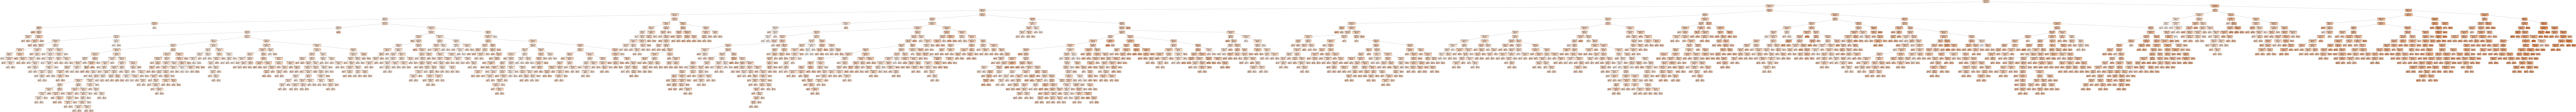

C:\Users\blake\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


ValueError: Unknown label type: 'continuous'